In [1]:
from KoopmanismResponse.dynamical_systems.Models import one_dim_map
from KoopmanismResponse.EDMD.EDMD import Edmd_Fourier
from KoopmanismResponse.utils.data_processing import get_spectral_properties
from matplotlib import pyplot as plt
import numpy as np

In [2]:
one_map = one_dim_map()
one_map.set_random_initial_condition()
one_map.M = 5* 10**5
t, x = one_map.integrate()

100%|██████████| 500000/500000 [00:00<00:00, 510650.57it/s]


Text(0.5, 0, 'x')

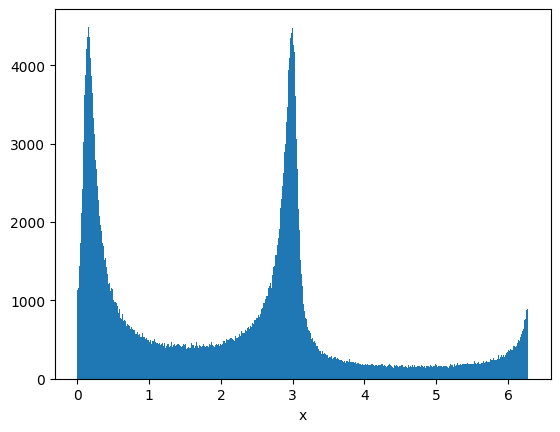

In [3]:
L = int( np.sqrt(len(x)) ) 
plt.hist(x,bins=L)
plt.xlabel("x")

In [4]:
# Set the EDMD algorithm
edmd = Edmd_Fourier()
edmd.dimension = 1
edmd.max_wave_vector = 30
edmd._set_indices()

In [ ]:
# Perform algorithm and get spectral properties
K = edmd.perform_edmd(data=x)
lambdas, V, W = get_spectral_properties(K)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
lambdas_plot = lambdas[:11]
fig, ax = plt.subplots()
thetas = np.linspace(0,2*np.pi,100)
ax.plot(np.cos(thetas),np.sin(thetas))
ax.scatter(np.real(lambdas_plot), np.imag(lambdas_plot),color='r')
ax.set_aspect('equal')